Successfully loaded Reddit social data.

--- Top 15 Keywords for Visualization ---
      keyword  frequency
0    analysis          2
4          ev          2
6         gas          2
7        grid          2
9       offer          2
10  officials          2
11        oil          2
12     routes          2
13   strategy          2
1     climate          3
5         fox          3
8     million          4
2        coal          5
14      trump          9
3      energy         11

Generating bar chart...


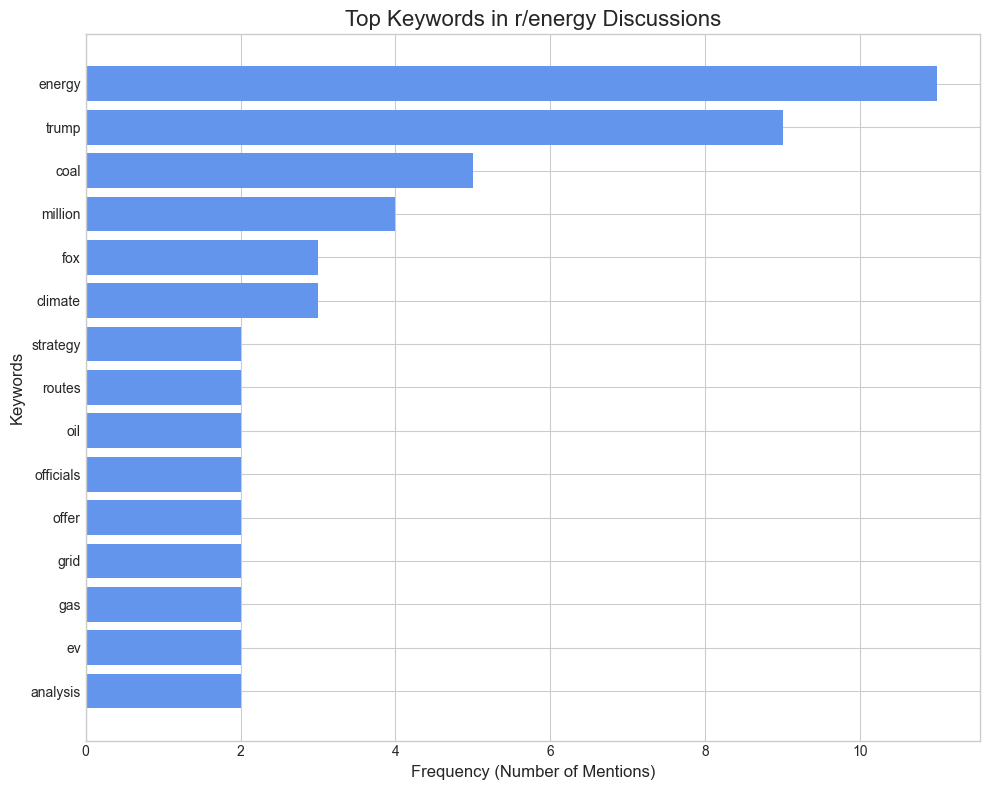


Chart saved to /figures/social_keywords_barchart.png


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import numpy as np

# --- 1. LOAD YOUR SOCIAL DATA ---
social_path = '../data/raw/reddit_titles.csv'

if not os.path.exists(social_path):
    print(f"Error: The file '{social_path}' was not found.")
else:
    df_social = pd.read_csv(social_path)
    print("Successfully loaded Reddit social data.")

    # --- 2. EXTRACT KEYWORDS AND FREQUENCIES ---
    social_titles = df_social['title'].dropna()
    
    try:
        # We use 15 features for a clean and readable chart
        vectorizer = CountVectorizer(stop_words='english', max_features=15)
        
        social_counts = vectorizer.fit_transform(social_titles)
        social_keywords = vectorizer.get_feature_names_out()
        
        # Sum the counts for each keyword to get its frequency
        summed_counts = np.array(social_counts.sum(axis=0)).flatten()
        
        # Create a DataFrame for easy plotting and sorting
        keywords_df = pd.DataFrame({
            'keyword': social_keywords,
            'frequency': summed_counts
        }).sort_values(by='frequency', ascending=True)

        print("\n--- Top 15 Keywords for Visualization ---")
        print(keywords_df)

        # --- 3. VISUALIZE THE RESULTS ---
        print("\nGenerating bar chart...")
        
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create the horizontal bar chart
        ax.barh(keywords_df['keyword'], keywords_df['frequency'], color='cornflowerblue')

        # Add title and labels
        ax.set_title('Top Keywords in r/energy Discussions', fontsize=16)
        ax.set_xlabel('Frequency (Number of Mentions)', fontsize=12)
        ax.set_ylabel('Keywords', fontsize=12)

        plt.tight_layout()
        
        # Save the figure to a file
        os.makedirs('../figures', exist_ok=True)
        plt.savefig('../figures/social_keywords_barchart.png')
        
        # Display the plot in the notebook
        plt.show()
        
        print("\nChart saved to /figures/social_keywords_barchart.png")

    except ValueError as e:
        print(f"\n--- Analysis Error --- \n{e}")